In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import joblib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load the dataset
mushroom_data = pd.read_csv('/content/mushroom_cleaned.csv')

In [ ]:
# Check for missing values
missing_values = mushroom_data.isnull().sum()
print(missing_values)  # There should be no missing values

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


In [ ]:
# Separate features (X) and target label (y)
X = mushroom_data.drop(columns='class')
y = mushroom_data['class']

In [ ]:
# Encoding categorical features (if necessary)
data_encoded = mushroom_data.apply(lambda col: pd.Categorical(col).codes if col.dtype == 'object' else col)


In [ ]:
# Check for NaN or Infinity values
print("\nCheck for NaN or Infinite values in the dataset:")
print(data_encoded.isna().sum())  # Check for NaN values
print((data_encoded == np.inf).sum())  # Check for infinity values


Check for NaN or Infinite values in the dataset:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


In [ ]:
# Replace infinity values with NaN and then fill NaN values with column mean
data_encoded.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinity with NaN
data_encoded.fillna(data_encoded.mean(), inplace=True)  # Fill NaN values with mean (for numerical columns)

In [ ]:
# Basic Data Exploration
print("Dataset Information:")
print(mushroom_data.info())  # Display information about the dataset (columns, data types, etc.)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB
None


In [ ]:
print("\nStatistical Overview:")
print(mushroom_data.describe())  # Statistical summary of numerical columns

print("\nNumber of Duplicates: ", mushroom_data.duplicated().sum())  # Check for duplicate rows


Statistical Overview:
       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  54035.000000  54035.000000     54035.000000  54035.000000   
mean     567.257204      4.000315         2.142056      7.329509   
std      359.883763      2.160505         2.228821      3.200266   
min        0.000000      0.000000         0.000000      0.000000   
25%      289.000000      2.000000         0.000000      5.000000   
50%      525.000000      5.000000         1.000000      8.000000   
75%      781.000000      6.000000         4.000000     10.000000   
max     1891.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season         class  
count  54035.000000  54035.000000  54035.000000  54035.000000  54035.000000  
mean       0.759110   1051.081299      8.418062      0.952163      0.549181  
std        0.650969    782.056076      3.262078      0.305594      0.497580  
min        0.000426      0.000000      0.000000     

In [ ]:
# Display the first few rows of the dataset to understand its structure
print("\nFirst 5 Rows of Data:")
print(mushroom_data.head())


First 5 Rows of Data:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  stem_ratio  
0        1545          11  1.804273      1    0.002464  
1        1557          11  1.804273      1    0.002445  
2        1566          11  1.804273      1    0.002307  
3        1566          11  1.804273      1    0.002419  
4        1464          11  0.943195      1    0.002535  


In [ ]:
# Data Shape
print(f"\n mushroom_data Dataset Shape: {mushroom_data.shape} (Rows, Columns)")


 mushroom_data Dataset Shape: (54035, 9) (Rows, Columns)


In [ ]:
# Check for null values
print("\nNull values per column:")
print(mushroom_data.isnull().sum())


Null values per column:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


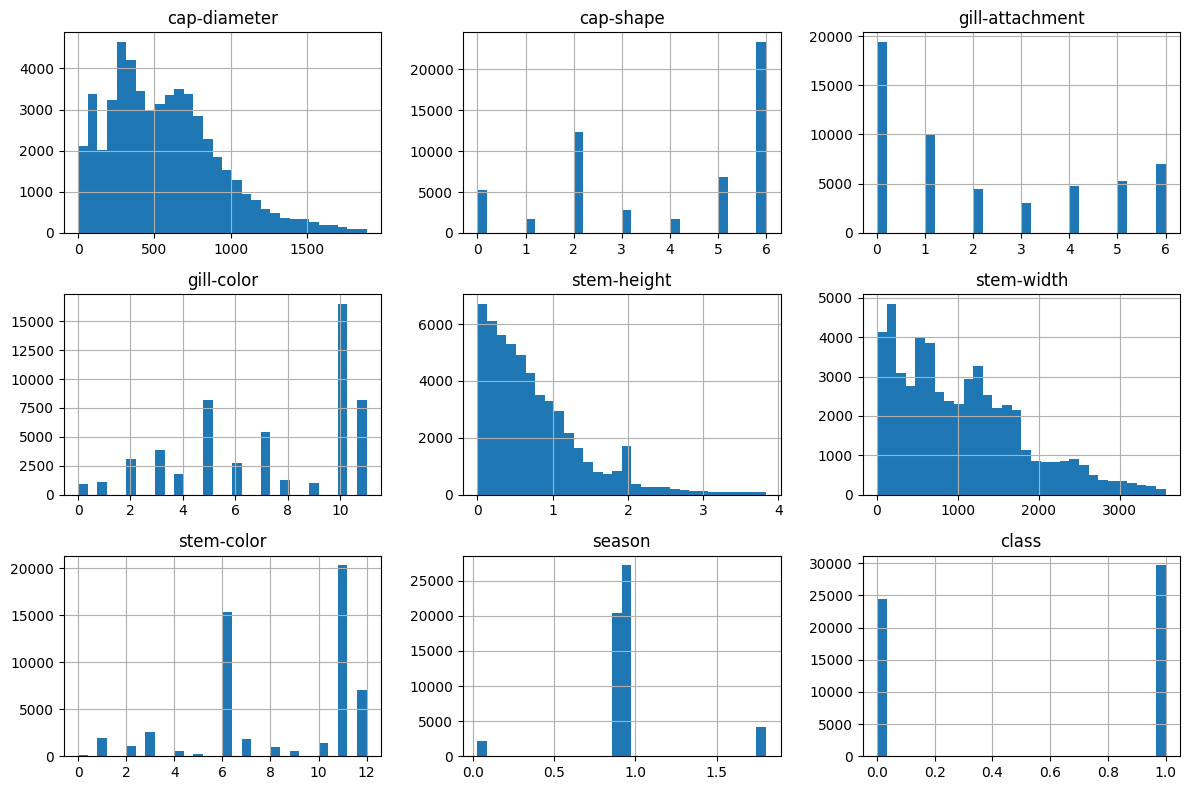

In [ ]:
# 2. Exploratory Data Analysis (EDA)
# Histograms for numerical columns
mushroom_data.hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

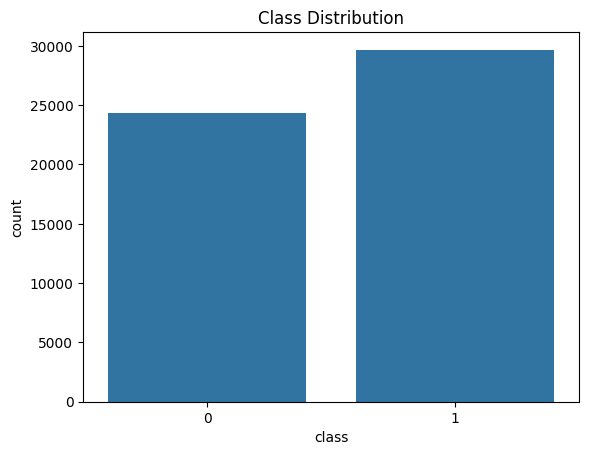

In [ ]:
# Count plot for the target variable
sns.countplot(x='class', data=mushroom_data)
plt.title("Class Distribution")
plt.show()

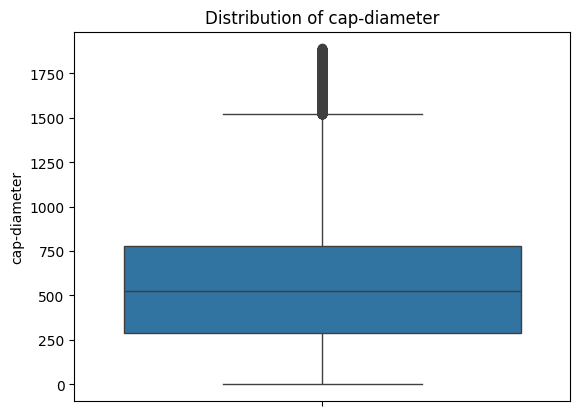

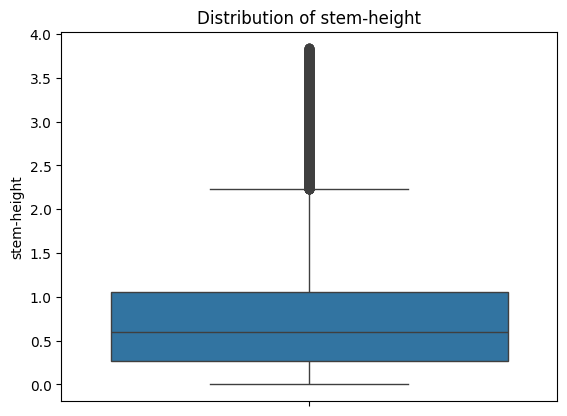

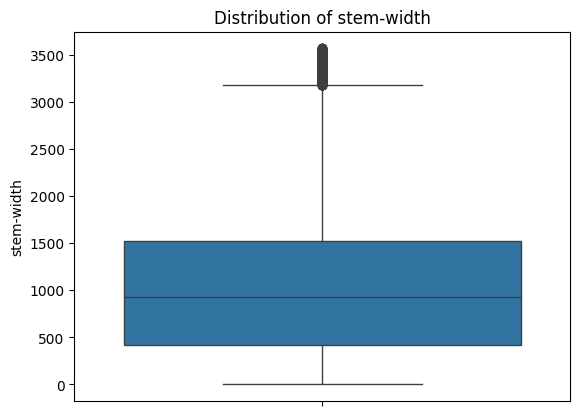

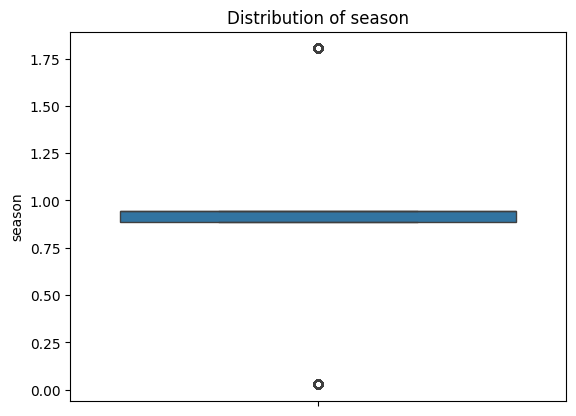

In [ ]:
# Boxplot for feature ranges
numeric_features = ['cap-diameter', 'stem-height', 'stem-width', 'season']
for feature in numeric_features:
    plt.figure()
    sns.boxplot(mushroom_data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()

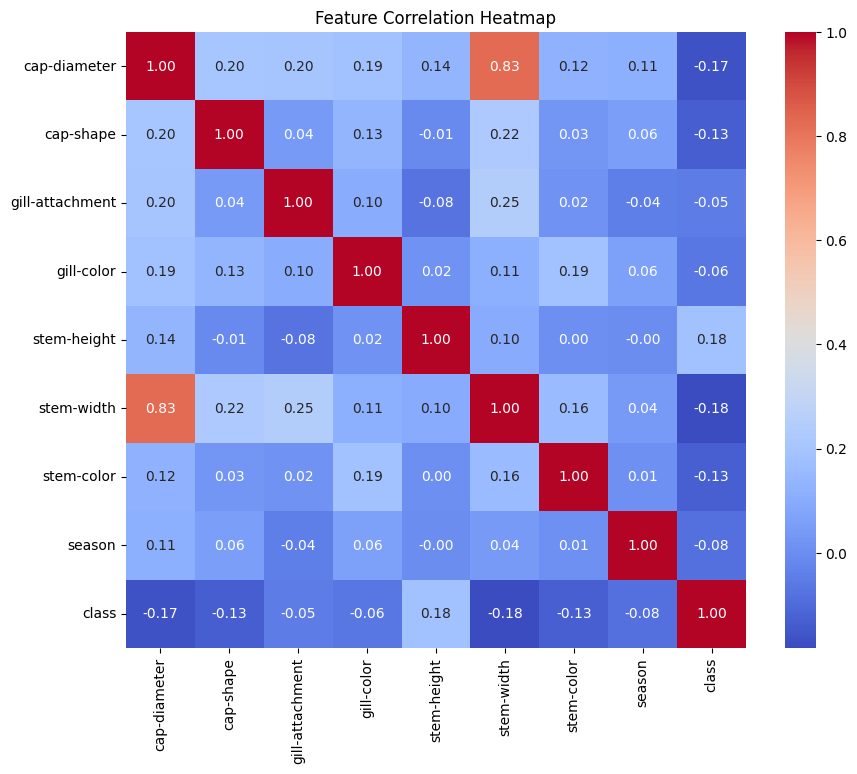

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(mushroom_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

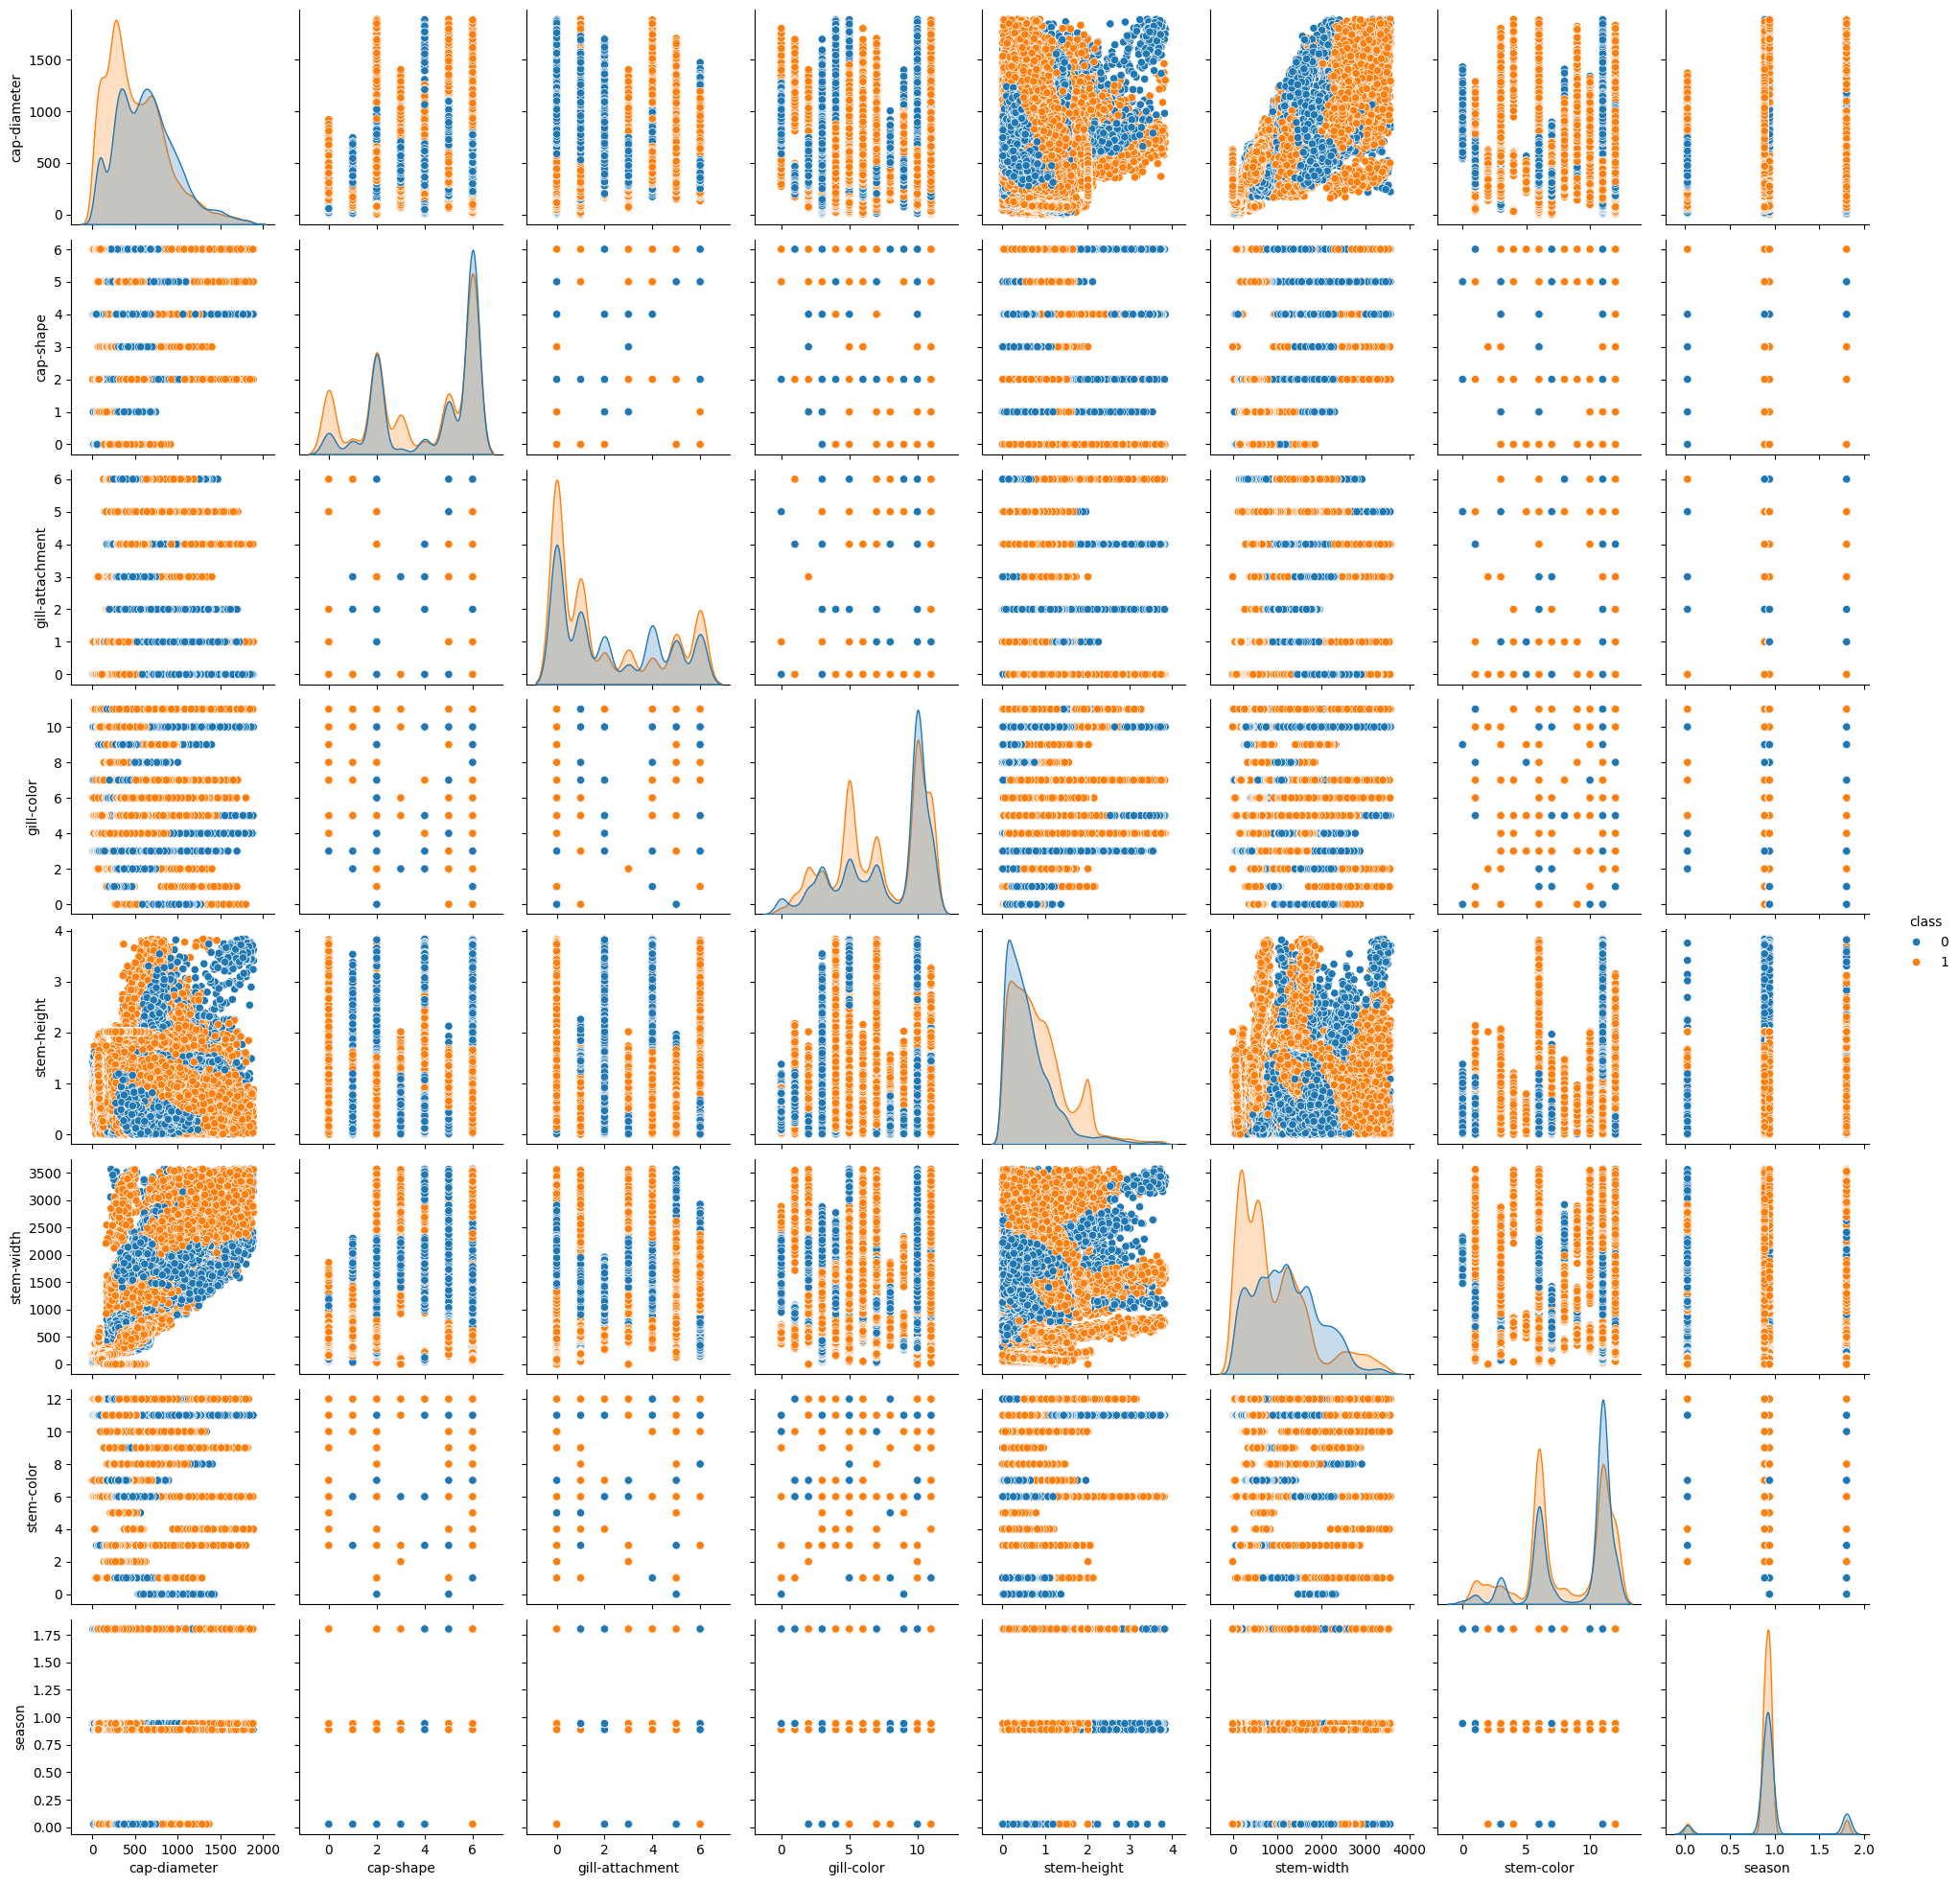

In [ ]:

# Pairplot
sns.pairplot(mushroom_data, hue="class", diag_kind="kde")
plt.show()

In [ ]:
# 3. Data Cleaning
# Decode numerical representations (if applicable)

# For demonstration, assuming "cap-shape" is categorical:
# cap_shape_mapping = {1: 'convex', 2: 'flat', 3: 'bell'}
# data['cap-shape'] = data['cap-shape'].map(cap_shape_mapping)

# Feature engineering: Create new features (example: feature interaction)
mushroom_data['stem_ratio'] = mushroom_data['stem-height'] / mushroom_data['stem-width']

In [ ]:
# Scaling numerical features
features = data_encoded.drop(columns=['class'])  # Exclude target column
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:

# Feature selection using Random Forest
X = scaled_data
y = data_encoded['class']
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("\nFeature Importance:\n", feature_importances.sort_values(ascending=False))


Feature Importance:
 stem-width         0.221296
gill-attachment    0.151493
cap-diameter       0.127356
gill-color         0.127206
stem-color         0.122258
stem-height        0.118581
cap-shape          0.093368
season             0.038442
dtype: float64


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy: ", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4872
           1       0.99      0.99      0.99      5935

    accuracy                           0.99     10807
   macro avg       0.99      0.99      0.99     10807
weighted avg       0.99      0.99      0.99     10807


Confusion Matrix:
 [[4822   50]
 [  64 5871]]

Accuracy:  0.9894512815767558


In [ ]:
# Save the model and predictions
joblib.dump(model, '/content/mushroom_model.pkl')
print("Model saved as mushroom_model.pkl")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results.to_csv('/content/mushroom_predictions.csv', index=False)
print("Predictions saved to mushroom_predictions.csv")

Model saved as mushroom_model.pkl
Predictions saved to mushroom_predictions.csv


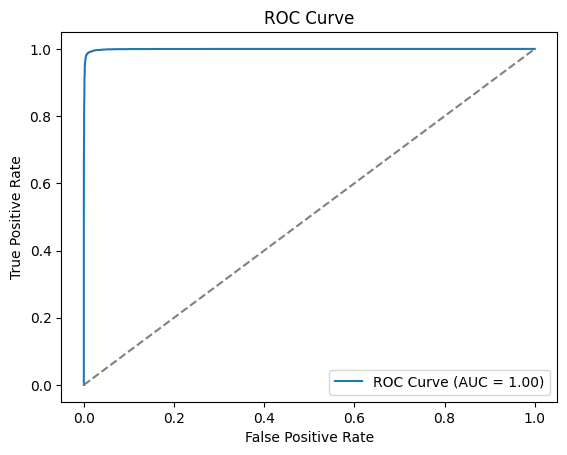

In [ ]:
# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]  # Get predicted probabilities for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=model.classes_[1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

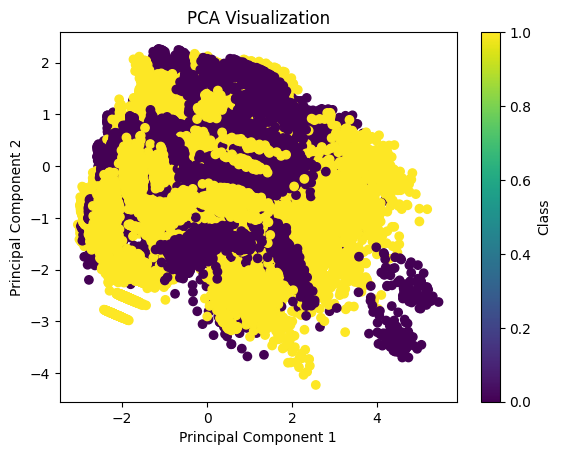

In [ ]:
# 6. Advanced Analysis
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(X)
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=y, cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class')
plt.show()

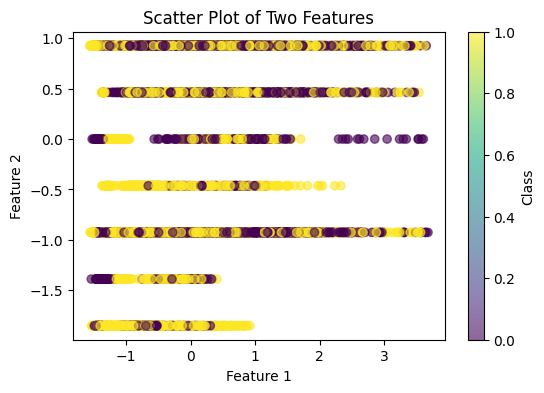

In [ ]:
# 3. Scatter Plot of Two Features (example: feature1 vs feature2)
# Let's assume the first two features for simplicity
plt.figure(figsize=(6, 4))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, cmap='viridis', alpha=0.6)
plt.title('Scatter Plot of Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

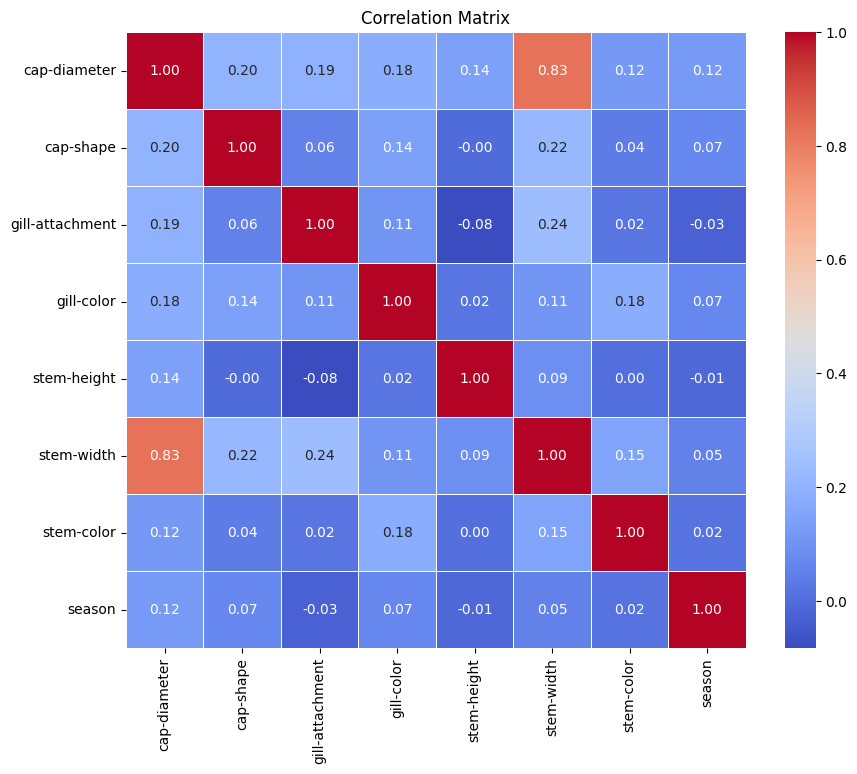

In [ ]:
# 4. Correlation Matrix
plt.figure(figsize=(10, 8))
# Calculate the correlation matrix from your data (e.g., X_test)
correlation_matrix = X_test.corr()  # Assuming X_test is your DataFrame
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

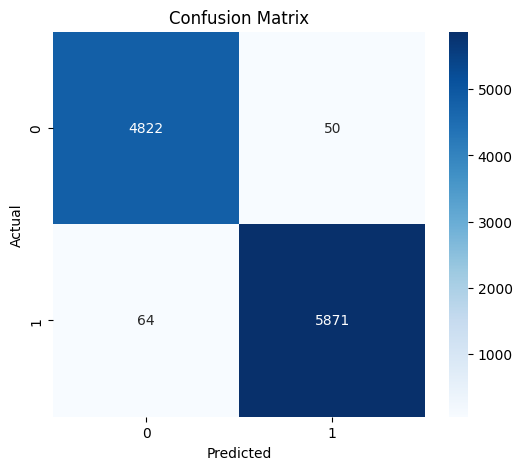

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Thresholding Using Mean
threshold = np.mean(y_prob)  # Using the mean of predicted probabilities as a threshold
y_pred_threshold = (y_prob >= threshold).astype(int)

Accuracy after thresholding: 98.95%


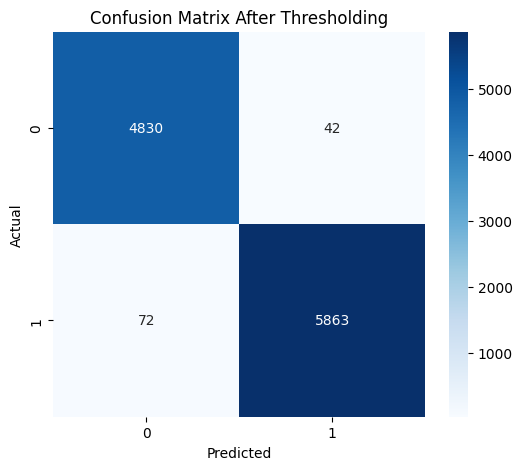

In [ ]:

# Accuracy with threshold
accuracy_threshold = accuracy_score(y_test, y_pred_threshold)
print(f"Accuracy after thresholding: {accuracy_threshold * 100:.2f}%")

# Confusion Matrix after thresholding
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix After Thresholding')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Accuracy
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {log_reg_acc}")

Logistic Regression Accuracy: 0.643379291200148


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Accuracy
dt_acc = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {dt_acc}")

Decision Tree Accuracy: 0.977236976034052


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_acc}")

Random Forest Accuracy: 0.9894512815767558


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Accuracy
knn_acc = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {knn_acc}")

KNN Accuracy: 0.988988618488017


In [ ]:
from sklearn.svm import SVC

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

# Accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_acc}")

SVM Accuracy: 0.9079300453409826


In [ ]:
from sklearn.model_selection import GridSearchCV

# Example of hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best Random Forest accuracy:", grid_rf.best_score_)

Best parameters for Random Forest: {'max_depth': 30, 'n_estimators': 100}
Best Random Forest accuracy: 0.9898676628045854


In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds
cv_scores = cross_val_score(rf, X, y, cv=5)

# Print the average accuracy
print(f"Random Forest 5-Fold CV Accuracy: {cv_scores.mean()}")

Random Forest 5-Fold CV Accuracy: 0.5366336633663366


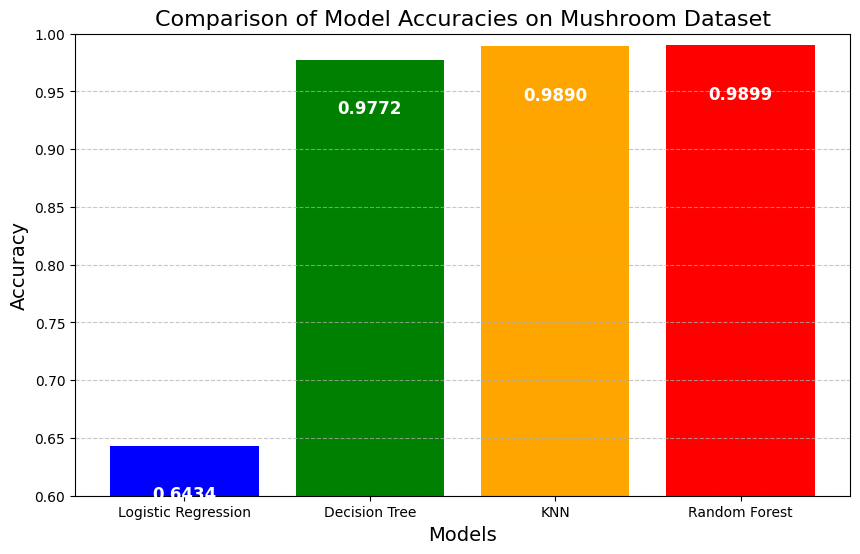

In [ ]:
# Data for accuracy values
models = ['Logistic Regression', 'Decision Tree', 'KNN', 'Random Forest']
accuracies = [0.6434, 0.9772, 0.9890, 0.9899]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])

# Annotate bars with accuracy values
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, f"{acc:.4f}",
             ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Graph aesthetics
plt.ylim(0.6, 1.0)
plt.title('Comparison of Model Accuracies on Mushroom Dataset', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Models', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
